In [1]:
import sys
import numpy as np
from astropy.io import fits
from astroscrappy import detect_cosmics
from matplotlib import pyplot as plt 
sys.path.append('aspired')

import twodspec

In [2]:
# Example data from SPRAT
# BLAP-09
sprat_data = fits.open('examples/v_e_20180704_32_1_0_2.fits')[0].data


aspired/twodspec.py:97: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


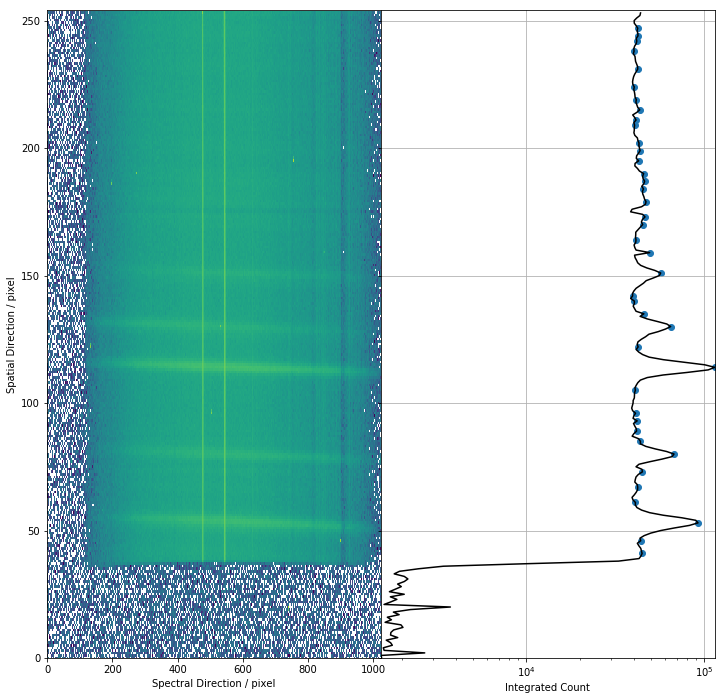

In [3]:
# (1) example of twodspec._find_peaks() without cosmic ray removal

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_data)[Waxis]
spatial_size = np.shape(sprat_data)[Saxis]

# the valid y-range of the chip (an array of int)
ydata = np.arange(spec_size)
ztot = np.sum(sprat_data, axis=Saxis)

peaks_y, heights_y = twodspec._find_peaks(sprat_data, spec_size, spatial_size, ydata, ztot, f_height=0.2, display=True)

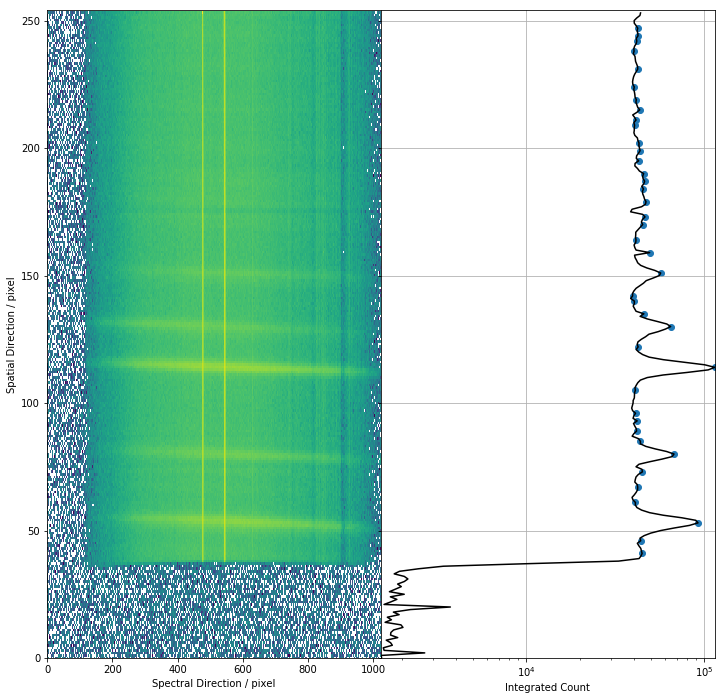

In [4]:
# (2) example of twodspec._find_peaks() with cosmic ray removal
peaks_y, heights_y = twodspec._find_peaks(detect_cosmics(sprat_data)[1], spec_size, spatial_size, ydata, ztot, f_height=0.2, display=True)

Tracing Aperture using nsteps=20


aspired/twodspec.py:210: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


Spectrum 1 : Trace gaussian width = [1.65976832 1.61241025 1.57036354 1.53961091 1.56590996 1.55228673
 1.52125858 1.49448863 1.51033411 1.43957594 1.40439294 1.41295747
 1.4218957  1.35680027 1.3740618  1.39576205 1.37863175 1.37729335
 1.31074096 0.        ] pixels
Step 1 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Step 2 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Step 3 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Step 4 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Step 5 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Step 6 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Step 7 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Step 8 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Step 9 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Step 10 of 20 of spec

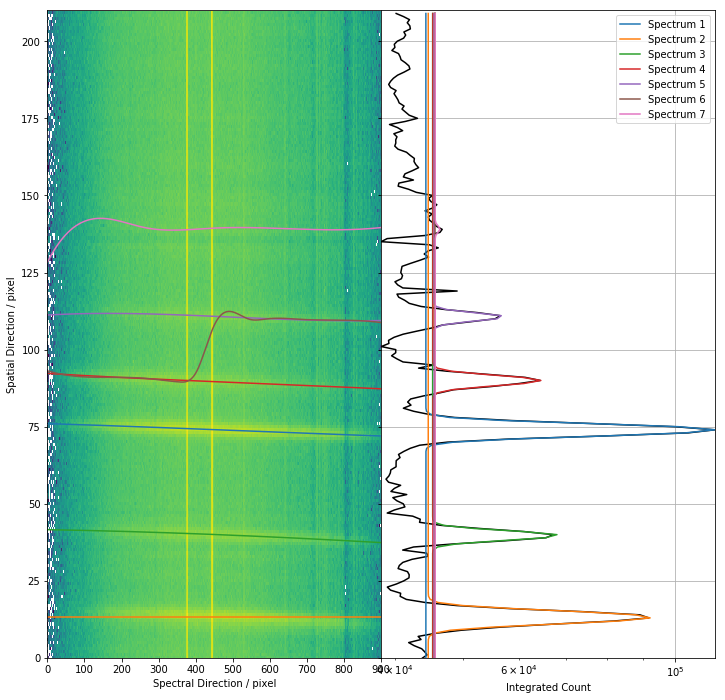

In [5]:
# (3) example of twodspec.ap_trace() with cosmic ray removal, selecting the 7 brightest spectra
#     in the pixel range covered by spatial_mask and spec_mask.
#     The 6th and 7th ones failed, error messages are printed but the code continues to run.

spatial_mask = np.arange(40,250)
spec_mask = np.arange(100,1000)

my, y_sigma = twodspec.ap_trace(sprat_data, nsteps=20, spatial_mask=spatial_mask, spec_mask=spec_mask,
                                cosmic=True, n_spec=7, recenter=False, prevtrace=(0, ), bigbox=8, Saxis=1,
                                nomessage=False, display=True)

aspired/twodspec.py:467: RuntimeWarning: invalid value encountered in log10
  np.log10(img[int(np.median(trace))-widthdn-skysep-skywidth-1:int(np.median(trace))+widthup+skysep+skywidth, :]),


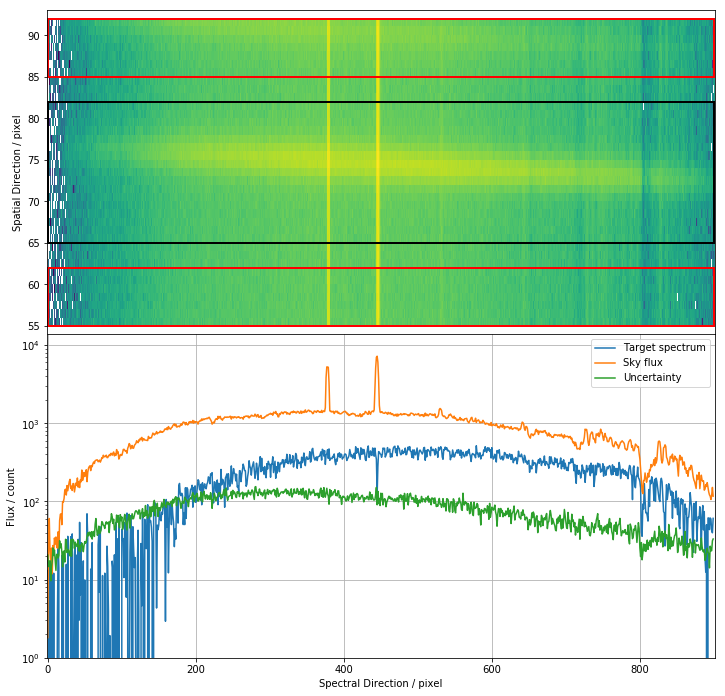

In [6]:
# (4) Extracting spectrum by summing over the aperture along the trace
spec, sky, err = twodspec.ap_extract(sprat_data, my[0], spatial_mask=spatial_mask, spec_mask=spec_mask, display=True)